In [6]:
from openai import OpenAI
from dotenv import load_dotenv
from langchain_community.vectorstores import FAISS
from langchain_community.document_loaders import PyPDFDirectoryLoader
from langchain_openai import OpenAIEmbeddings
import numpy as np

import os
from Utils.embedding import plot_results


load_dotenv()

client = OpenAI()
embeddings = OpenAIEmbeddings(model="text-embedding-3-large", chunk_size=1)
test_text_embeddings = [
    "UNA",
    "Für was steht UNA?",
    "Für was steht UNH?",
    "Für was steht DTM?",
    "Für was steht FTX?",
    "Für was steht SG1?",
    "Für was steht RFF?",
    "Für was steht NAD?",
    "Für was steht PYT?",
    "Für was steht LIN?",
]
pdf_directory = "pdfs"
if os.path.exists("feiss_index/index.faiss") and os.path.exists(
    "feiss_index/index.pkl"
):
    print(f"Loading existing FAISS index from")
    faiss_index = FAISS.load_local("feiss_index", embeddings= embeddings,allow_dangerous_deserialization=True)
else:
    print(f"Creating new FAISS index and saving to")
    pdf_files = [
        os.path.join(pdf_directory, file)
        for file in os.listdir(pdf_directory)
        if file.endswith(".pdf")
    ]

    pages = []
    loader = PyPDFDirectoryLoader(pdf_directory, extract_images=False)
    pages = loader.load_and_split()

    faiss_index = FAISS.from_documents(pages, embeddings)

Loading existing FAISS index from


Erstelle eine Matrix mit jedem Embedding, aber mit verändertem K-Parameter. So kannst du die Unterschiede besser analysieren.

In [17]:
results_score = np.zeros((10, 10))
results_embedding = []
for i in range(10):
    results_score[i, :] = np.array(
        faiss_index.similarity_search_with_score(test_text_embeddings[i], 10)
    )[:, 1]
    results_embedding.append(
        faiss_index.similarity_search(test_text_embeddings[i], 10)
    )

Visualisierung der Scores zu den einzelnen Fragen.

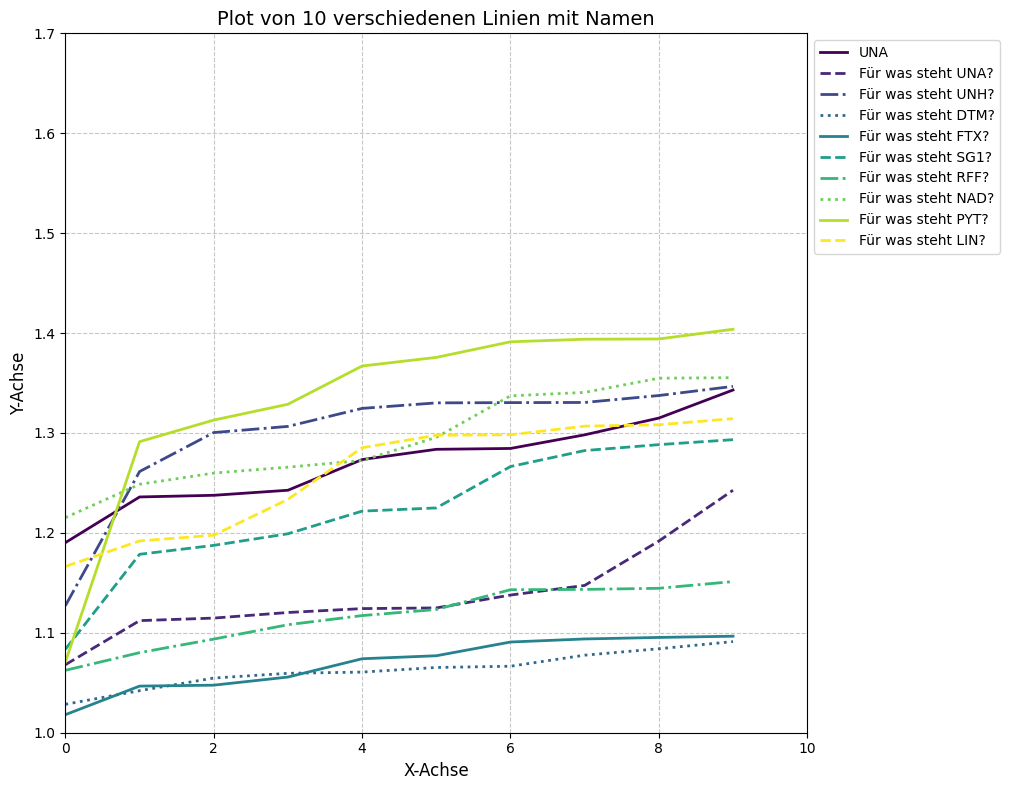

In [15]:
plot_results(results_score, test_text_embeddings)

Betrachten wir nun die besten Ergebnis für die Frage "Was bedeutet FTX? Das Ergebnis zeigt, dass die richtigen Informationen ausgewählt wurden, wie aus dem PDF-Auszug ersichtlich ist.

In [21]:
print(results_embedding[4][0].page_content)

VDA-Empfehlung  4938  Version 1.1  , April 2012  Seite  41  von 157  
 
Segmente  
 
Bez = Objekt -Bezeichner  St = Status  
Nr = Laufende Segmentnummer im Guide  EDIFACT: M=Muss/Mandatory, C=Conditional  
MaxWdh = Maximale Wiederholung der Segmente/Gruppen  Anwendung: R=Erforderlich/Required, O=Optional,  
Zähler = Nummer der Segmente/Gruppen im EDIFACT - D=Abhängig von/Dependent, A=Empfohlen/Advised, N=Nicht  
Standard  benutzt/Not used  
Copyright: VDA  Generated by GEFEG.FX  
  Zähler  Nr Bez St MaxWdh  Ebene  Name  
 0070  11  FTX  O 99 1 Allgemeine Informationen  
 
 Standard  Implementation  
Bez  Name  St  Format   St Format  Anwendung / Bemerkung  
FTX        
4451  Textbezug, Qualifier  M an..3   M an..3   
       AAI Allgemeine Information  
4453  Textfunktion, Code  C an..3   N  Nicht genutzt  
C107  Text-Referenz  C   N   
4441  Freier Text, Code  M an..17   N  Nicht genutzt  
1131  Codeliste, Code  C an..17   N  Nicht genutzt  
3055  Verantwortliche Stelle für die  
Codep

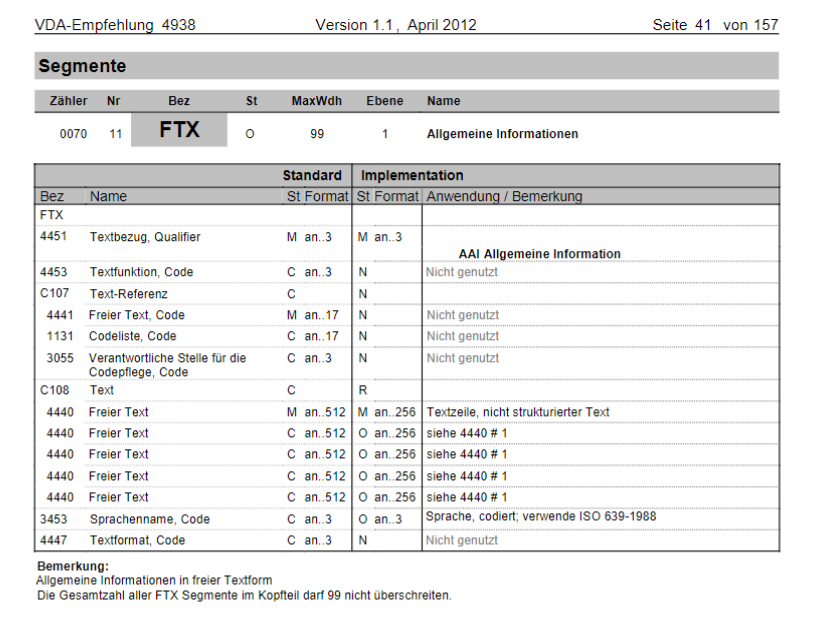

Betrachten wir nun das schlechteste Ergebnis für die Frage "Was bedeutet FTX? Das Ergebnis zeigt, dass nur teilweise richtige Informationen ausgewählt wurden, wie im PDF-Auszug zu sehen ist, da es sich hier um ein Untersegment handelt.

In [24]:
print(results_embedding[4][9].page_content)

VDA-Empfehlung  4938  Version 1.1  , April 2012  Seite  97  von 157  
 
Segmente  
 
Bez = Objekt -Bezeichner  St = Status  
Nr = Laufende Segmentnummer im Guide  EDIFACT: M=Muss/Mandatory, C=Conditional  
MaxWdh = Maximale Wiederholung der  Segmente/Gruppen  Anwendung: R=Erforderlich/Required, O=Optional,  
Zähler = Nummer der Segmente/Gruppen im EDIFACT - D=Abhängig von/Dependent, A=Empfohlen/Advised, N=Nicht  
Standard  benutzt/Not used  
Copyright: VDA  Generated by GEFEG.FX  
  Zähler  Nr Bez St MaxWdh  Ebene  Name  
 
 1090   SG26  R 900 1 Positionsebene  
 
 1230  58  FTX  O 99 2 Text (Grund) der Steuerbefreiung  
 
 Standard  Implementation  
Bez  Name  St  Format   St Format  Anwendung / Bemerkung  
FTX        
4451  Textbezug, Qualifier  M an..3   M an..3   
       TXD Steuererklärung  
4453  Textfunktion, Code  C an..3   N  Nicht genutzt  
C107  Text-Referenz  C   N   
4441  Freier Text, Code  M an..17   N  Nicht genutzt  
1131  Codeliste, Code  C an..17   N  Nicht genutzt  

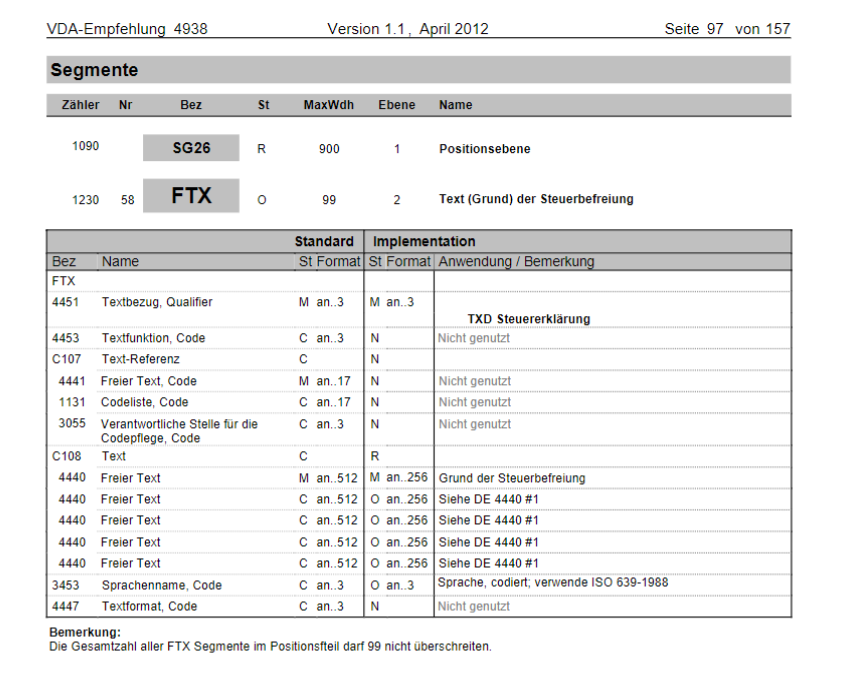